# Approved Permits EDA
Initial Visualizations and Exploratory data analysis. Explanations of relevant graphs and their analyses are in the report. This EDA focuses on base questions 1 and 2.

Note: This notebook was curated for use with the final report as a more polished distillation of our work. Some less interesting or important analysis is left out for brevity, but is available in the original project notebooks.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

# estimated runtime ~15 seconds

In [54]:
df = pd.read_csv("../data/cleaned_a80.csv")
df_q1 = df.copy()
df.head(5)

,id,project_id,name,zipcode,city,type,status,sqft,text,lat,lon,year,month,day
0,21411,2501,Jackson Square Recreation Center,2119.0,Roxbury,NPC,Board Approved,38500.0,the proposed project as described in the npc c...,42.3229,-71.0981,2016.0,12.0,15.0
1,21412,2502,Brooke Charter High School,2124.0,Mattapan,Large Project,Construction Complete,95000.0,the brooke charter high school proposed the co...,42.2936,-71.0935,2018.0,8.0,21.0
2,21413,2508,1000 Boylston Street,2115.0,Back Bay,Large Project,Board Approved,513000.0,the proposed project consists of a single cond...,42.3475,-71.0864,2019.0,5.0,28.0
3,21414,2509,Allston Yards Building B,2134.0,Allston,Large Project,Board Approved,636500.0,guest street building b in the allston yards ...,42.3566,-71.1411,2023.0,1.0,27.0
4,21415,2510,Wentworth Multipurpose Academic Building,2215.0,Mission Hill,Large Project,Construction Complete,69000.0,the mpa building will contain laboratories stu...,42.3359,-71.0948,2018.0,11.0,8.0


We will start by addressing the base questions and then look at some additional EDA

### Square Feet by year

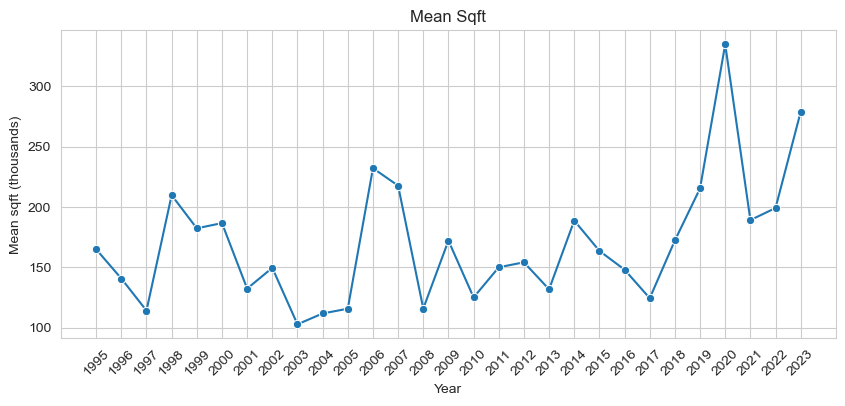

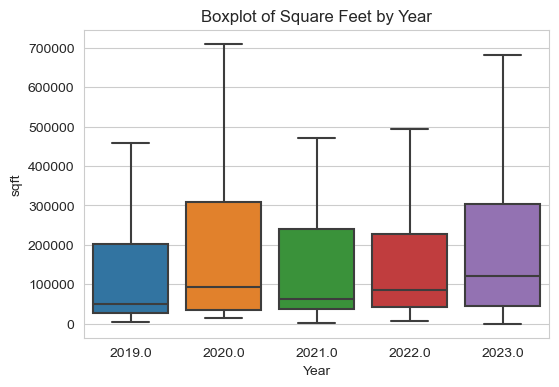

In [55]:
no_zeros = df_q1[df_q1['sqft'] > 0]
yearly_sqft = no_zeros.groupby('year')['sqft'].mean().apply(lambda x : x/1000).reset_index()

plt.figure(figsize=(10, 4))
sns.lineplot(data=yearly_sqft, x='year', y='sqft', marker='o')
plt.title('Mean Sqft')
plt.xlabel('Year')
plt.xticks([int(year) for year in yearly_sqft.year], rotation=45)
plt.ylabel('Mean sqft (thousands)')
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='year', y='sqft', data=no_zeros[no_zeros['year'] >= 2019], showfliers=False)
plt.xlabel('Year')
plt.ylabel('sqft')
plt.title('Boxplot of Square Feet by Year')
plt.show()

### Description

In [56]:
# First, Group by year and aggregate by type, extracting the types into individual columns
df_w = df_q1.pivot_table(index='year', columns='type', aggfunc='size', fill_value=0).reset_index().set_index('year').rename_axis(columns=None)
df_w.index.name = None

# Now sort by most approved (max so we can see interesting cases)
df_w = df_w[df_w.index >= 2010] # bad data before 2010
df_w = df_w[df_w.max().sort_values(ascending=False).index]

# Add total column
df_w.insert(0, '[TOTAL]', df_w.iloc[:, 1:].sum(axis=1))

df_w.head()

,[TOTAL],Large Project,Small Project,NPC
2010.0,19,12,16,3
2011.0,14,6,10,4
2012.0,25,10,20,5
2013.0,21,24,16,5
2014.0,13,27,7,6


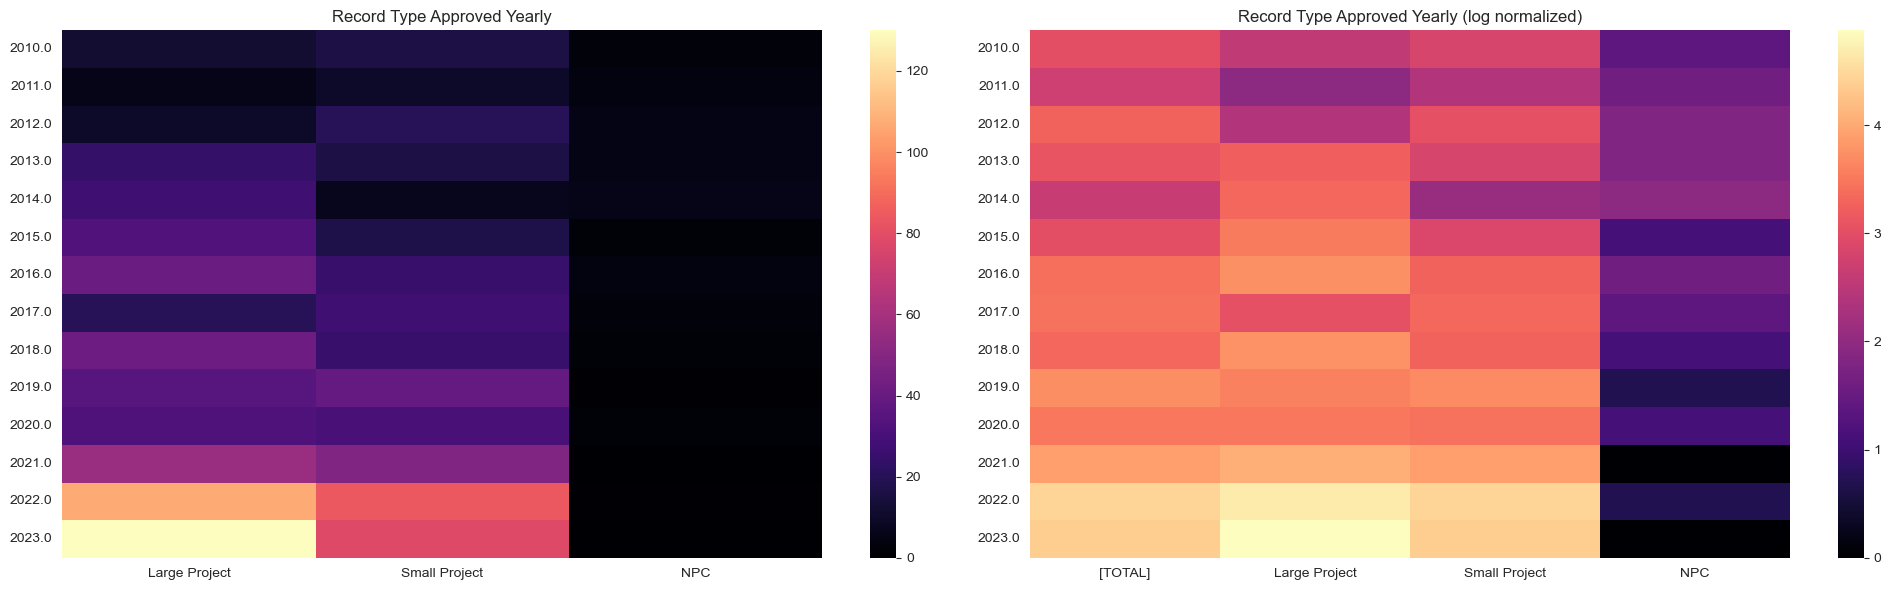

In [57]:
df_w_norm = np.log1p(df_w) # normalize for a better visualization

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
cmap = sns.color_palette("magma", as_cmap=True)

plt.subplot(1, 2, 1)
sns.heatmap(df_w.iloc[:, 1:30], cmap=cmap, ax=axes[0], cbar_kws={"orientation": "vertical"})
axes[0].set_title('Record Type Approved Yearly')
plt.yticks(rotation=0)


plt.subplot(1, 2, 2)
sns.heatmap(df_w_norm, cmap='magma', ax=axes[1], cbar_kws={"orientation": "vertical"})
axes[1].set_title('Record Type Approved Yearly (log normalized)')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

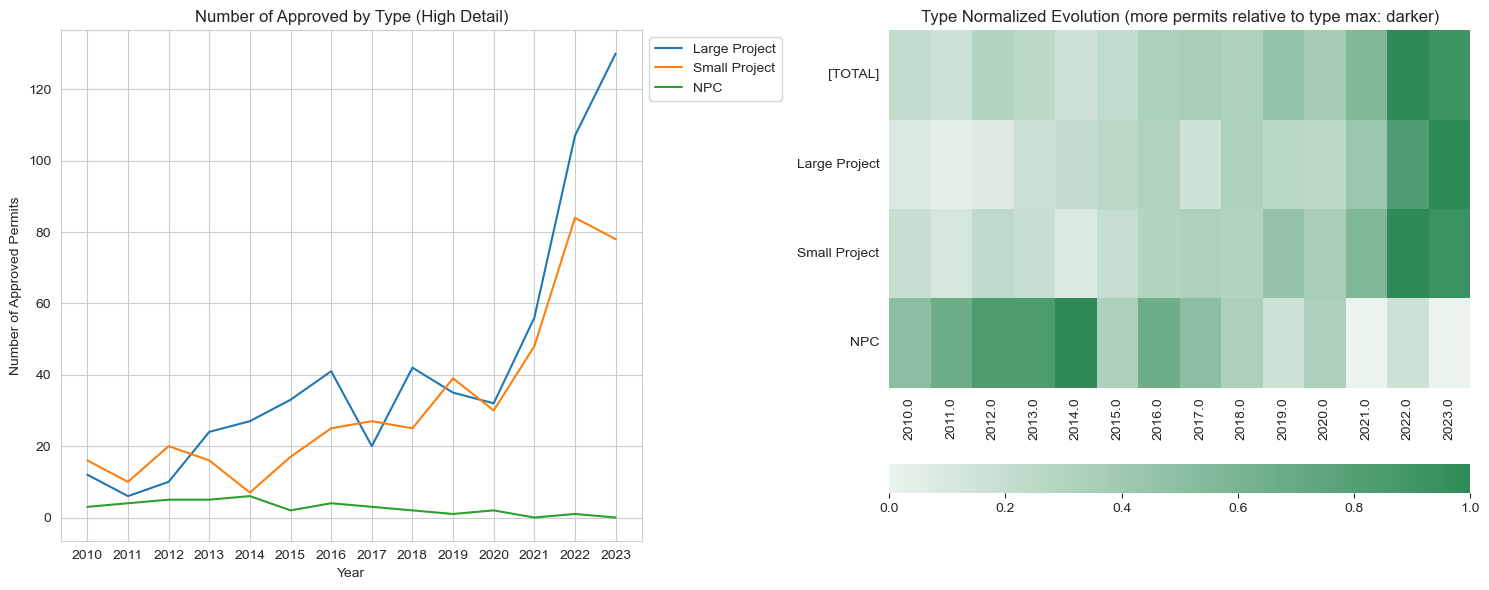

In [58]:
# Get just the most significant columns
temp = df_w.iloc[:, 1:12]

plt.figure(figsize=(15, 6))

# First subplot - Line plot
plt.subplot(1, 2, 1)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Type (High Detail)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Second subplot - Heatmap
plt.subplot(1, 2, 2)
temp_normalized = df_w.div(df_w.iloc[:, 0:].max(), axis=1)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(temp_normalized.T, cmap=cmap, cbar_kws={"orientation": "horizontal"})
plt.title('Type Normalized Evolution (more permits relative to type max: darker)')

plt.tight_layout()
plt.show()

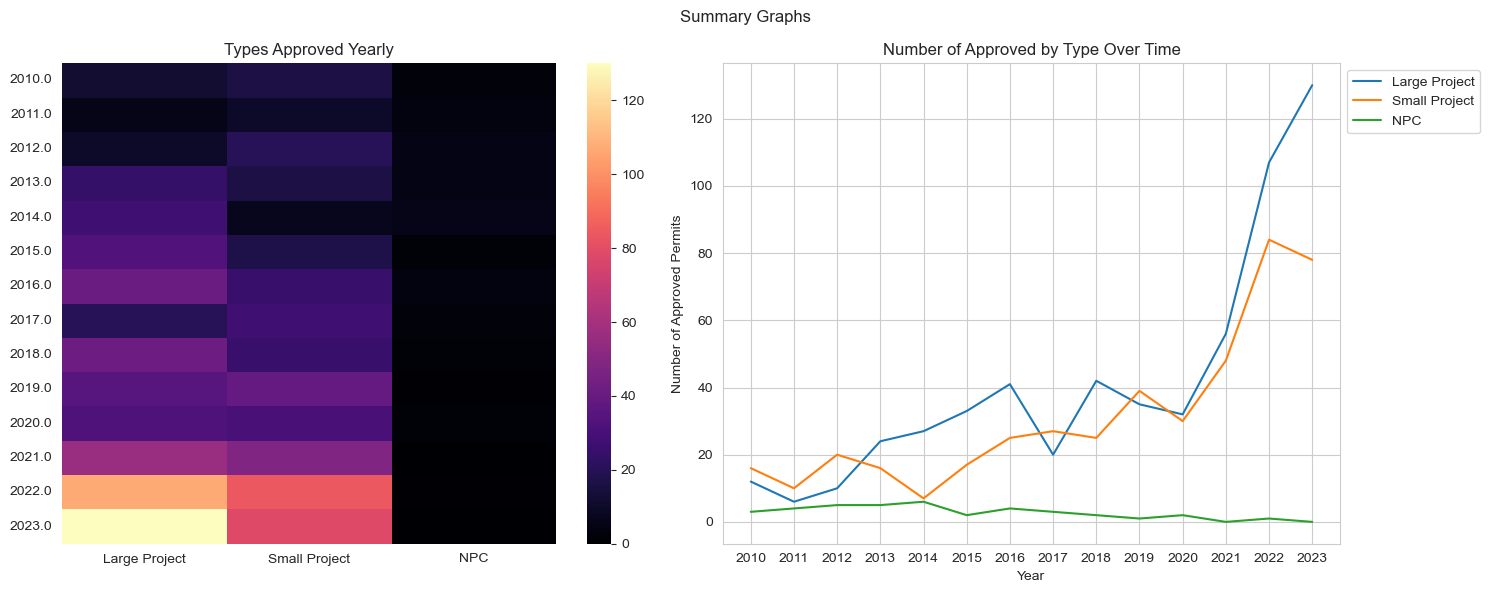

In [59]:
df_w_norm = np.log1p(df_w) # normalize for a better visualization

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
cmap = sns.color_palette("magma", as_cmap=True)

plt.subplot(1, 2, 1)
sns.heatmap(df_w.iloc[:, 1:7], cmap=cmap, ax=axes[0], cbar_kws={"orientation": "vertical"})
plt.yticks(rotation=0)
axes[0].set_title('Types Approved Yearly')

temp = df_w.iloc[:, 1:6]  # Get just the most significant columns

plt.subplot(1, 2, 2)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Type Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.suptitle('Summary Graphs')
plt.tight_layout()
plt.show()

### Status

In [60]:
# First, Group by year and aggregate by type, extracting the types into individual columns
df_w = df_q1.pivot_table(index='year', columns='status', aggfunc='size', fill_value=0).reset_index().set_index('year').rename_axis(columns=None)
df_w.index.name = None

# Now sort by most approved (max so we can see interesting cases)
df_w = df_w[df_w.index >= 2010] # bad data before 2010
df_w = df_w[df_w.max().sort_values(ascending=False).index]

# Add total column
df_w.insert(0, '[TOTAL]', df_w.iloc[:, 1:].sum(axis=1))

df_w.head()

,[TOTAL],Board Approved,Construction Complete,Under Review,Permitted / Under Construction,Letter of Intent,Prefile (Default)
2010.0,31,0,31,0,0,0,0
2011.0,19,1,19,0,0,0,0
2012.0,34,1,34,0,0,0,0
2013.0,44,1,44,0,0,0,0
2014.0,39,1,39,0,0,0,0


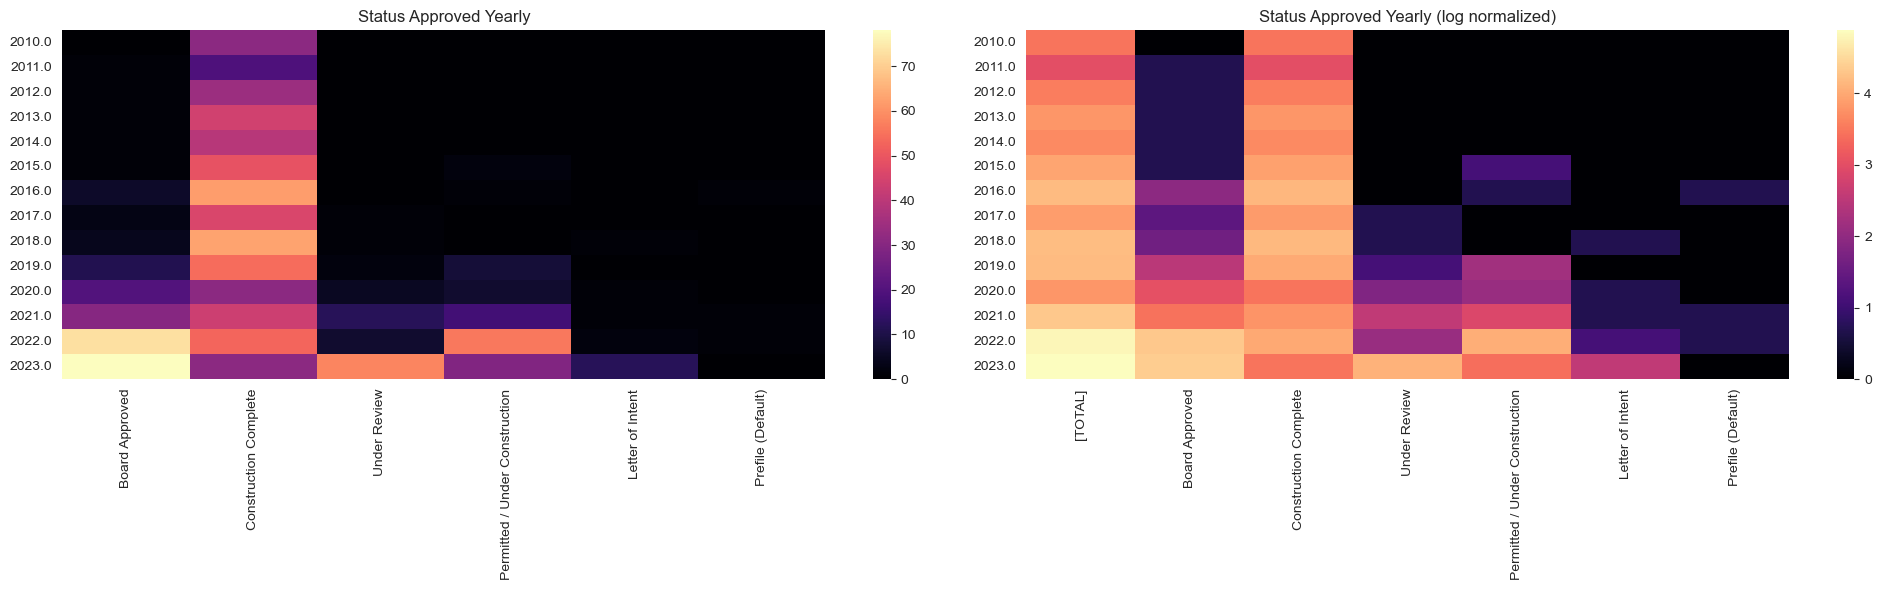

In [61]:
df_w_norm = np.log1p(df_w) # normalize for a better visualization

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
cmap = sns.color_palette("magma", as_cmap=True)

plt.subplot(1, 2, 1)
sns.heatmap(df_w.iloc[:, 1:30], cmap=cmap, ax=axes[0], cbar_kws={"orientation": "vertical"})
axes[0].set_title('Status Approved Yearly')
plt.yticks(rotation=0)


plt.subplot(1, 2, 2)
sns.heatmap(df_w_norm, cmap='magma', ax=axes[1], cbar_kws={"orientation": "vertical"})
axes[1].set_title('Status Approved Yearly (log normalized)')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

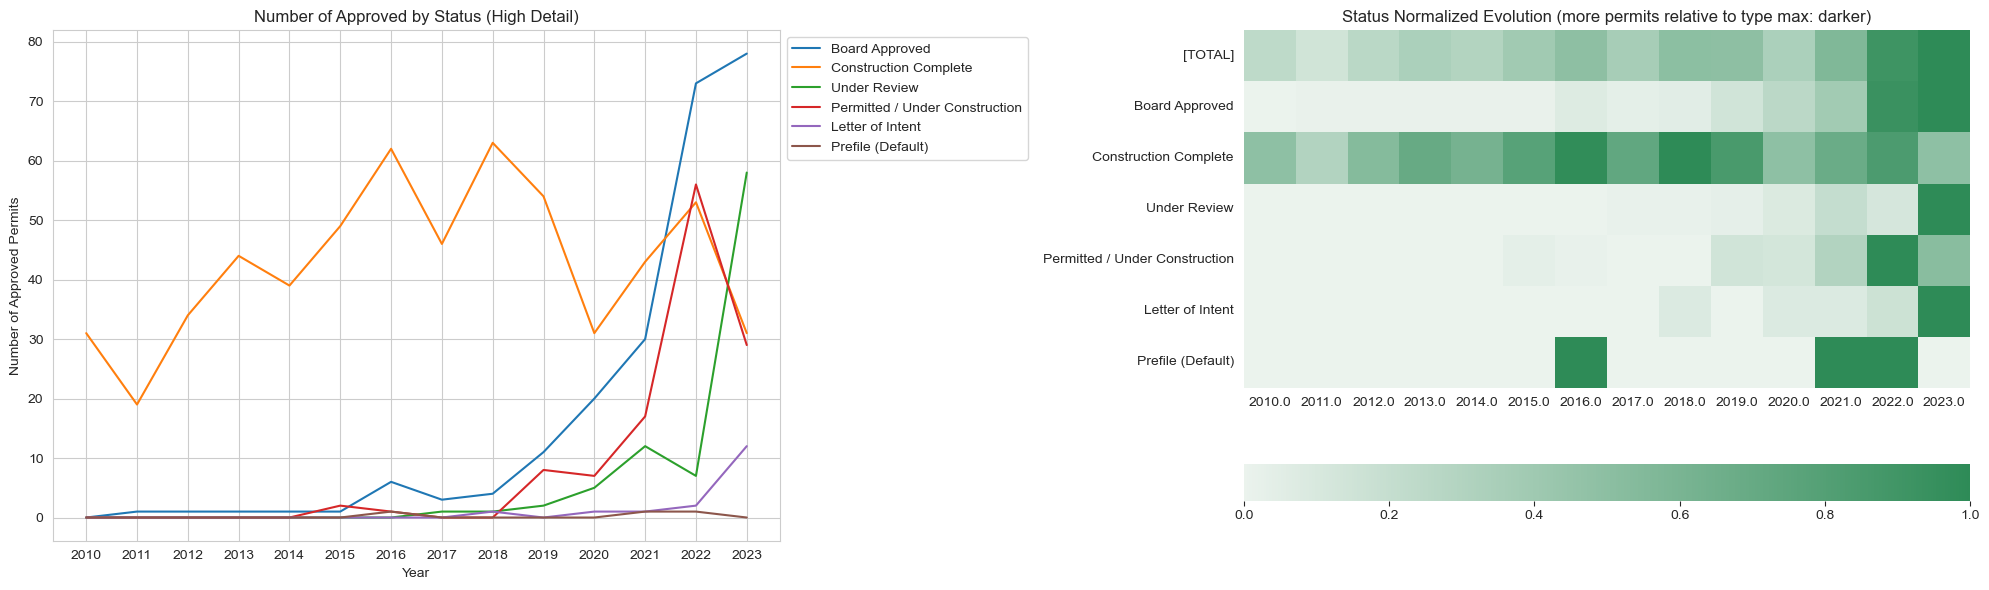

In [62]:
# Get just the most significant columns
temp = df_w.iloc[:, 1:12]

plt.figure(figsize=(20, 6))

# First subplot - Line plot
plt.subplot(1, 2, 1)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Status (High Detail)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Second subplot - Heatmap
plt.subplot(1, 2, 2)
temp_normalized = df_w.div(df_w.iloc[:, 0:].max(), axis=1)
cmap = sns.light_palette("seagreen", as_cmap=True)
sns.heatmap(temp_normalized.T, cmap=cmap, cbar_kws={"orientation": "horizontal"})
plt.title('Status Normalized Evolution (more permits relative to type max: darker)')

plt.tight_layout()
plt.show()

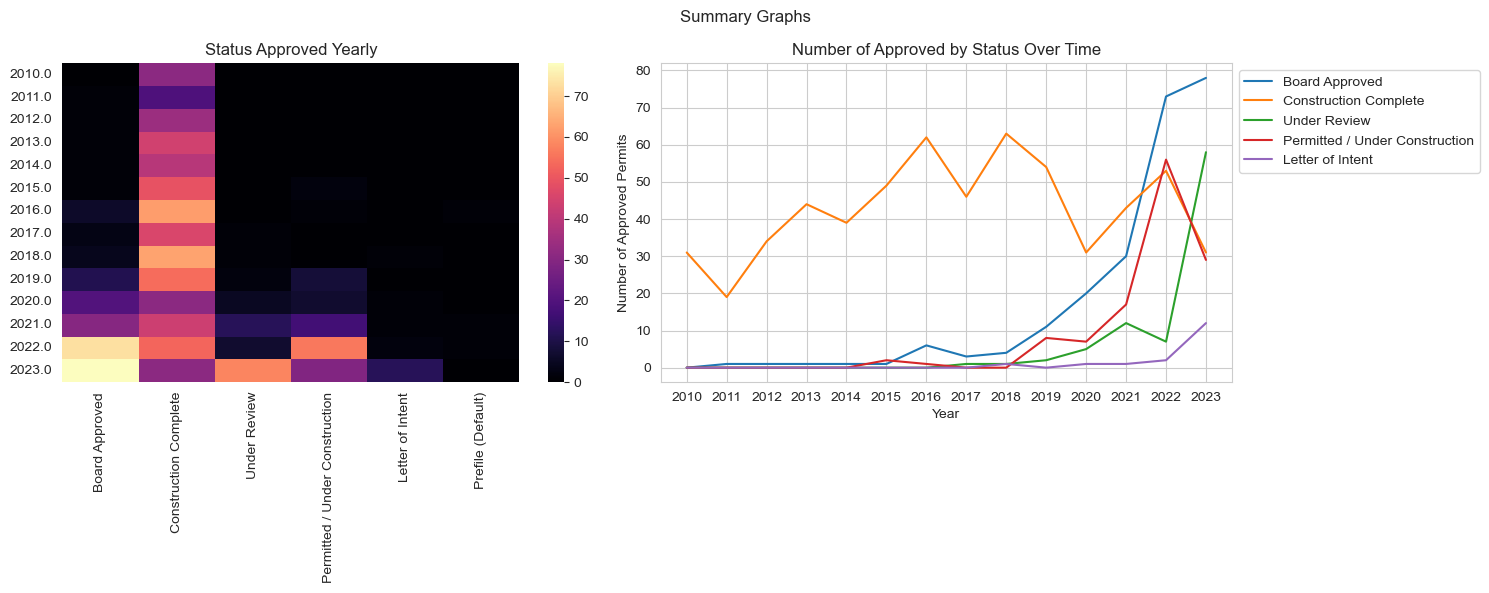

In [63]:
df_w_norm = np.log1p(df_w) # normalize for a better visualization

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
cmap = sns.color_palette("magma", as_cmap=True)

plt.subplot(1, 2, 1)
sns.heatmap(df_w.iloc[:, 1:7], cmap=cmap, ax=axes[0], cbar_kws={"orientation": "vertical"})
plt.yticks(rotation=0)
axes[0].set_title('Status Approved Yearly')

temp = df_w.iloc[:, 1:6]  # Get just the most significant columns

plt.subplot(1, 2, 2)
for column in temp.columns:
    plt.plot(temp.index, temp[column], label=column)

plt.xlabel('Year')
plt.xticks([int(year) for year in temp.index])
plt.ylabel('Number of Approved Permits')
plt.title('Number of Approved by Status Over Time')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.suptitle('Summary Graphs')
plt.tight_layout()
plt.show()

### Extra EDA

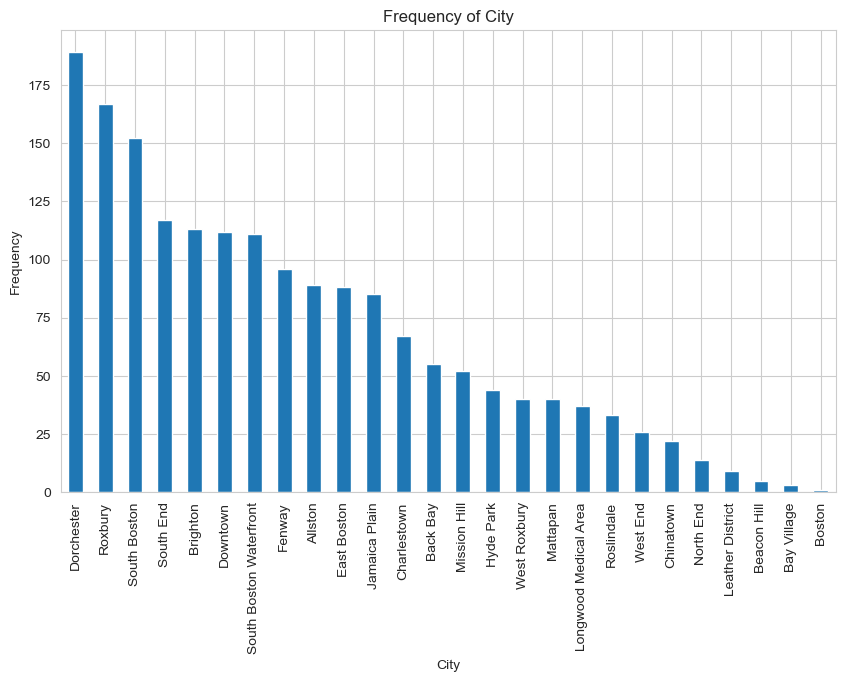

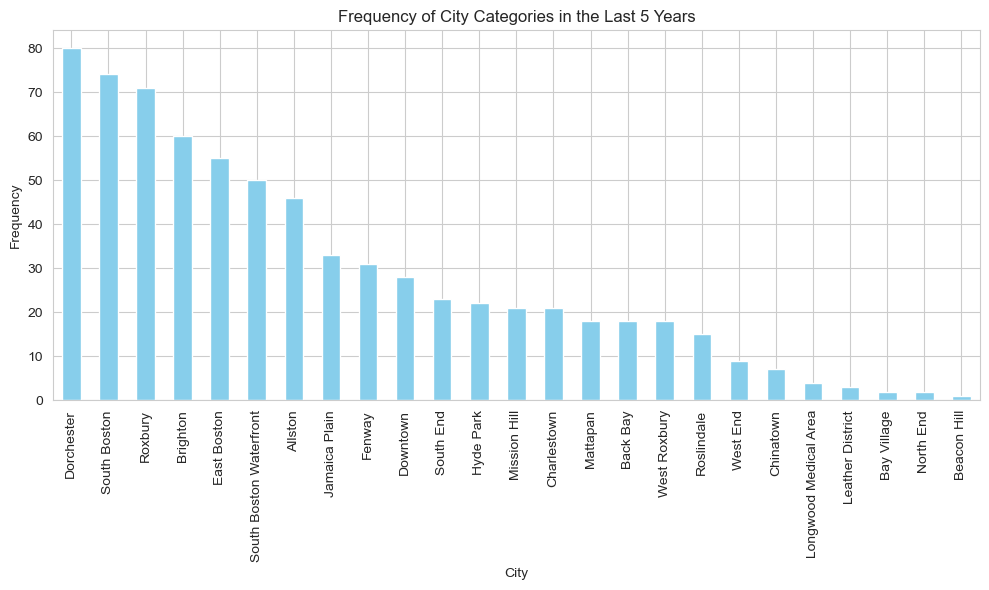

In [64]:
plt.figure(figsize=(10, 6))
counts = df['city'].value_counts()
counts.plot(kind='bar')

plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Frequency of City')
plt.show()

last_5_years = df[df['year'] >= 2023 - 5]

neighborhood_counts = last_5_years['city'].value_counts()


plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar', color='skyblue')

plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Frequency of City Categories in the Last 5 Years')

plt.tight_layout()
plt.show()


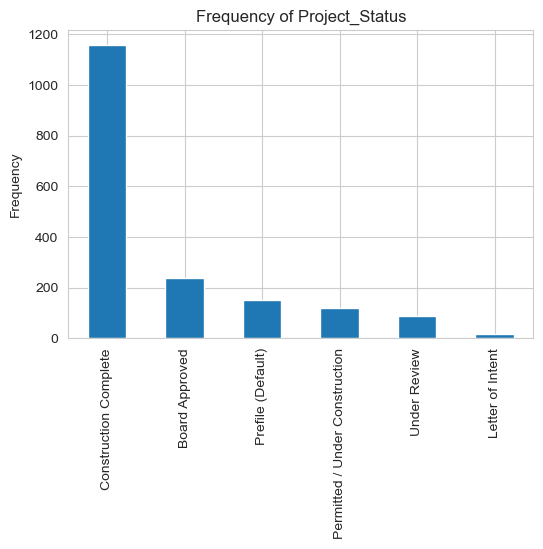

In [65]:
plt.figure(figsize=(6, 4))
counts = df['status'].value_counts()
counts.plot(kind='bar')

plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Frequency of Project_Status')
plt.show()

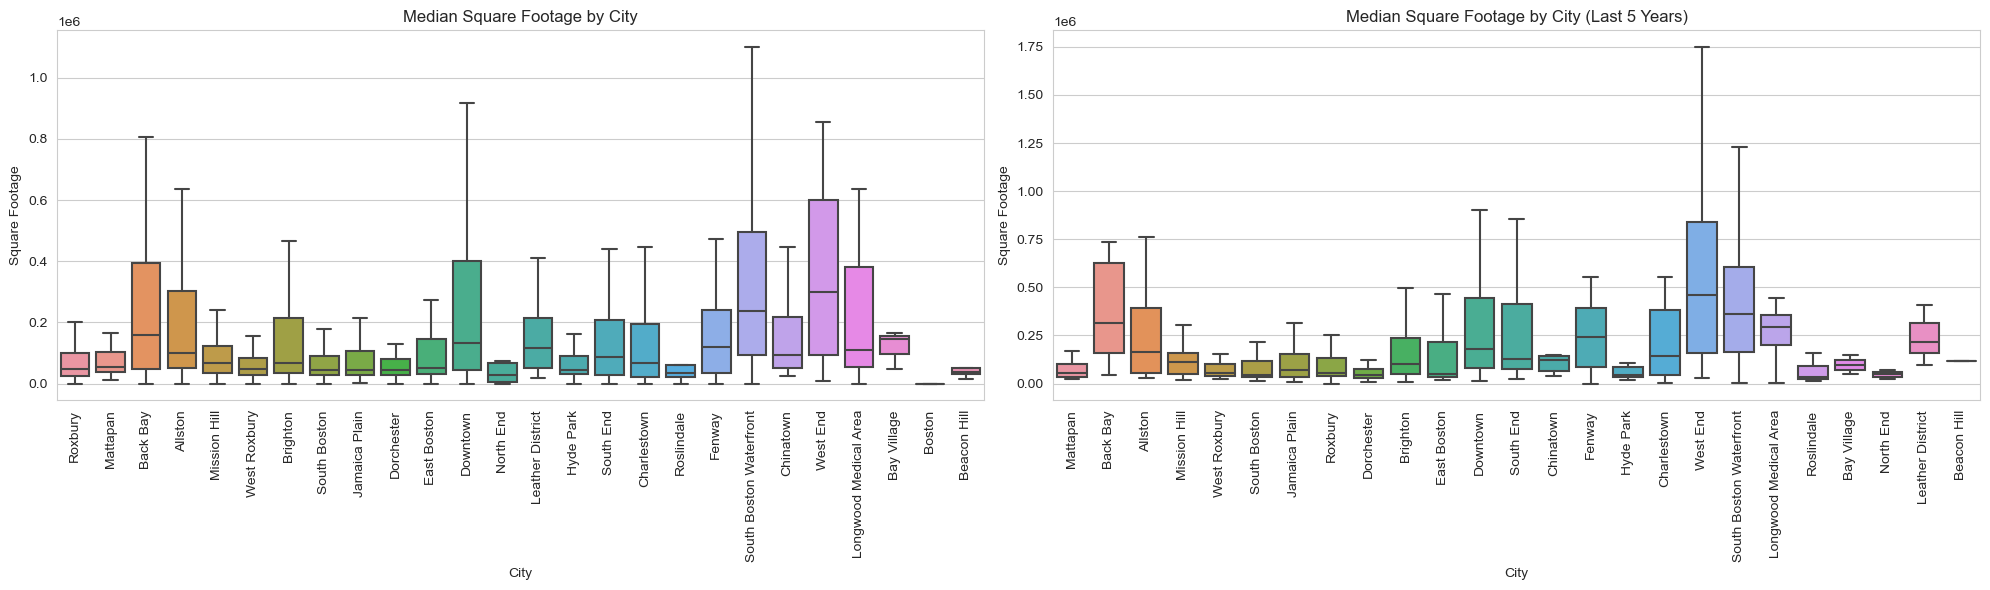

In [66]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
ax = sns.boxplot(x="city", y="sqft", data=df, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('City')
plt.ylabel('Square Footage')
plt.title('Median Square Footage by City')



plt.subplot(1,2,2)
ax = sns.boxplot(x="city", y="sqft", data=last_5_years, showfliers=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('City')
plt.ylabel('Square Footage')
plt.title('Median Square Footage by City (Last 5 Years)')

plt.tight_layout()
plt.show()
